### `Load Libraries`

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

### `Load Dataset`

In [2]:
(X_train, Y_train), (X_test,Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 224s 20us/step


### `Preprocessing`

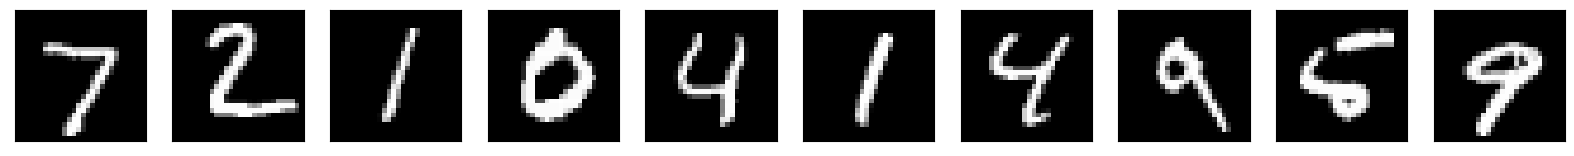

In [3]:
n = 10 #how many digits we will display
plt.figure(figsize=(20,4))
for i in range(n):
    # Display orignal
    ax = plt.subplot(2,n,i+1)
    plt.imshow(X_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

### `Reshape Test and Train`

In [4]:
print(f'Previous X_train shape: {X_train.shape}\nPrevious Y_train shape {Y_train.shape}')
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
classes = 10
Y_train = to_categorical(Y_train,classes)
Y_test = to_categorical(Y_test,classes)
print(f'New X_train shape: {X_train.shape}\nNew Y_train shape {Y_train.shape}')

Previous X_train shape: (60000, 28, 28)
Previous Y_train shape (60000,)
New X_train shape: (60000, 784)
New Y_train shape (60000, 10)


### `Setting up Parameter`

In [5]:
input_size = 784
batch_size = 200
hidden1 = 400
hidden2 = 20
classes = 10
epochs = 5

### `Built the Model`

In [6]:
model = Sequential()
model.add(Dense(hidden1,input_dim=input_size,activation='relu'))
# output = relu (dot( W, input)+ bias)
model.add(Dense(hidden2,activation='relu'))
model.add(Dense(classes, activation='softmax'))
# Compilation
model.compile(loss='categorical_crossentropy',
              metrics = ['accuracy'], optimizer='sgd')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               314000    
                                                                 
 dense_1 (Dense)             (None, 20)                8020      
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 322,230
Trainable params: 322,230
Non-trainable params: 0
_________________________________________________________________


### `Training the Model`

In [7]:
from time import time
# Record current time to measure training time
tic = time()

# Fit the model on training data
model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,verbose=1)

# Record time after model training
toc = time()

# Calculate and print total time taken by model on training
print(f'Model training took {toc-tic} secs')

Epoch 1/5
300/300 [==============================] - 4s 11ms/step - loss: 1.6969 - accuracy: 0.5041
Epoch 2/5
300/300 [==============================] - 3s 9ms/step - loss: 0.7422 - accuracy: 0.8297
Epoch 3/5
300/300 [==============================] - 3s 9ms/step - loss: 0.4998 - accuracy: 0.8715
Epoch 4/5
300/300 [==============================] - 3s 10ms/step - loss: 0.4135 - accuracy: 0.8891
Epoch 5/5
300/300 [==============================] - 3s 9ms/step - loss: 0.3667 - accuracy: 0.9006
Model training took 16.03016448020935 secs


### `Testing The Model`

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

# Pridict probability fir tge test set using trained model
y_pred_probs = model.predict(X_test,verbose=0)
y_pred = np.where(y_pred_probs>0.5,1,0)

# Calculate and pring test accuracy using pridicted and true label
print(f"Test Accuracy is {accuracy_score(y_pred,Y_test)}")

# Define a mask for selecting a range of indices (20 to 49)
mask = range(20,50)

# Select first 20 samples from test set for visculization
X_valid = X_test[20:40]
acutal_label = Y_test[20:20]

# Predict probability for selecting validation sample
y_pred_probs_valid = model.predict(X_valid)
y_pred_valid = np.where(y_pred_probs_valid>0.5,1,0)

# Set up a figure to display images
n = len(X_valid)
plt.figure(figsize=(20,4))
for i in range(n):
    # Display orignal
    ax = plt.subplot(2,n,i+1)
    plt.imshow(X_valid[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display predicted digits
    predicted_digit = np.argmax(y_pred_probs_valid[i])
    ax = plt.subplot(2,n,i+1+n)
    plt.text(0.5,0.5,str(predicted_digit),fontsize=12,ha='center',va='center')
    plt.axis('off')
plt.show()
plt.close()